<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/RNN_2025_09_27_add_faeture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [5]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_health
/content/DATA_PICTURE_3D_Change/picture_health/h_0.009_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.009_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.012_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.039_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.025_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.039_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.008_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.027_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.091_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.099_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.051_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.021_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.054_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.095_void_0.3.csv
/content/DATA_PICTURE_3D_Change/p

In [44]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


x_health , y_health , z_health = [] , [] , []

for i in total_health_x_y_z:
  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])


x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )

TOTAL_X_health_vector = []
TOTAL_Target_X_health_vector = []

window_size = 2
for picture in z_health:
    picture_reshaped = picture.reshape(16, 3)  # 16 ردیف، هر ردیف 3 ستون (x,y,z)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        # ورودی = 3 ردیف پشت سر هم
        TOTAL_X_health_vector.append(picture_reshaped[i : i + window_size])   # (3,3)
        # خروجی = ردیف بعد از این 3 تایی
        TOTAL_Target_X_health_vector.append(picture_reshaped[i + window_size]) # (3,)

TOTAL_X_health_vector_array = np.array(TOTAL_X_health_vector).reshape(-1, window_size, 3)
TOTAL_Target_X_health_vector_array = np.array(TOTAL_Target_X_health_vector).reshape(-1, 3)

print(TOTAL_X_health_vector_array.shape)   # (N, 3, 3)
print(TOTAL_Target_X_health_vector_array.shape)  # (N, 3)

(5544, 2, 3)
(5544, 3)


In [45]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_health_vector_array,TOTAL_Target_X_health_vector_array , test_size=0.3 , random_state = 42 )

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 - 3s - 60ms/step - loss: 2.9732 - mse: 2.9732 - val_loss: 0.7802 - val_mse: 0.7802
Epoch 2/50
49/49 - 0s - 6ms/step - loss: 0.2916 - mse: 0.2916 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 3/50
49/49 - 0s - 6ms/step - loss: 0.0708 - mse: 0.0708 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 4/50
49/49 - 0s - 6ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 5/50
49/49 - 0s - 6ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 6/50
49/49 - 0s - 6ms/step - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 7/50
49/49 - 0s - 6ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 8/50
49/49 - 0s - 6ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 9/50
49/49 - 0s - 6ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 10/50
49/49 - 0s - 6ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 11

In [96]:
Total_Feature = []
Total_Label_Feature = []

In [69]:
# TOTAL_SEQ_ERROR_HEALTH = []
# window_size = 2

# for picture in z_health[::4]:
#     picture_reshaped = picture.reshape(16, 3)
#     n_samples = picture_reshaped.shape[0] - window_size

#     # ساخت دیتای ورودی/خروجی
#     new_sample_x, new_sample_y = [], []
#     for i in range(n_samples):
#         new_sample_x.append(picture_reshaped[i : i + window_size])
#         new_sample_y.append(picture_reshaped[i + window_size])

#     new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
#     new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

#     # پیش‌بینی کل توالی
#     total_y_pre = []
#     for i in new_sample_x_array:
#         t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
#         y_pre = model.predict(t, verbose=0)
#         total_y_pre.append(y_pre[0])
#     total_y_pre = np.array(total_y_pre)

#     # -------- خطای وزن‌دار --------
#     errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)



#     avg_error = np.mean(errors)       # میانگین کل
#     last_error = errors[-1]           # آخرین فریم
#     tail_mean = np.mean(errors[-3:])
#     tail_size = 5
#     tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
#     ratio_tail = tail_mean / (avg_error + 1e-12)

#     threshold_factor = 1.5

#     penalty = 0.0
#     multiplier = 5.0

#     clip_penalty=True
#     max_penalty=0.5

#     if ratio_tail > threshold_factor:
#         # گزینه ساده: جریمه متناسب با اختلاف
#         penalty = multiplier * (tail_mean - avg_error)
#         # یا می‌توان از درصدی از mean_error استفاده کرد:
#         # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

#         if clip_penalty:
#             penalty = np.clip(penalty, 0.0, max_penalty)

#     # مقدار MSE پایه (میانگین خطا)
#     base_mse = avg_error

#     # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
#     augmented_mse = base_mse + penalty



#     features = {
#         "mean": np.mean(errors),
#         "max": np.max(errors),
#         "std": np.std(errors),
#         "last": errors[-1],
#         "ratio": np.max(errors) / (np.mean(errors) + 1e-8) ,
#         "penalty": penalty
#     }

#     Total_Feature.append([features["mean"], features["max"], features["std"], features["last"], features["ratio"] , features["penalty"] , augmented_mse ])
#     Total_Label_Feature.append('0')

# # print("میانگین خطای توالی سالم:", np.mean(TOTAL_SEQ_ERROR_HEALTH))

In [97]:
TOTAL_SEQ_ERROR_HEALTH = []
Total_Feature = []
Total_Label_Feature = []

window_size = 2
tail_size = 5         # تعداد فریم‌های انتهایی
tail_weight = 3.0     # وزن برای خطای انتهایی
slope_weight = 2.0    # وزن برای شیب انتهایی

for picture in z_health[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    # ساخت دیتای ورودی/خروجی
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # -------- محاسبه خطا --------
    errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    avg_error = np.mean(errors)

    # -------- محاسبه خطای انتهایی --------
    tail_errors = errors[-tail_size:] if tail_size <= len(errors) else errors
    tail_mean = np.mean(tail_errors)

    # -------- شیب خطا --------
    if len(tail_errors) > 1:
        slope = tail_errors[-1] - tail_errors[0]
        slope_penalty = max(slope, 0.0)
    else:
        slope_penalty = 0.0

    # -------- محاسبه augmented_mse --------
    augmented_mse = avg_error + tail_weight * tail_mean + slope_weight * slope_penalty

    # -------- استخراج ویژگی‌ها --------
    features = {
        "mean": avg_error,
        "max": np.max(errors),
        "std": np.std(errors),
        "last": errors[-1],
        "ratio": np.max(errors) / (avg_error + 1e-8),
        "tail_mean": tail_mean,
        "slope_penalty": slope_penalty,
        "augmented_mse": augmented_mse
    }

    Total_Feature.append([
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["ratio"],
        features["tail_mean"],
        features["slope_penalty"],
        features["augmented_mse"]
    ])
    Total_Label_Feature.append('0')


In [70]:
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_alpha':
            total_alpha_x_y_z.append(img)
            label_alpha.append(i)

x_alpha , y_alpha , z_alpha = [] , [] , []
for i in total_alpha_x_y_z:
    x_alpha.append(i['x'])
    y_alpha.append(i['y'])
    z_alpha.append(i['z'])

x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )

TOTAL_SEQ_ERROR_ALPHA = []
r = 0

for picture in z_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # -------- خطای وزن‌دار --------
    errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)


    # -------- خطای وزن‌دار --------
    errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

    avg_error = np.mean(errors)       # میانگین کل
    last_error = errors[-1]           # آخرین فریم
    tail_mean = np.mean(errors[-3:])
    tail_size = 5
    tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    ratio_tail = tail_mean / (avg_error + 1e-12)

    threshold_factor = 1.5

    penalty = 0.0
    multiplier = 5.0

    clip_penalty=True
    max_penalty=0.5

    if ratio_tail > threshold_factor:
        # گزینه ساده: جریمه متناسب با اختلاف
        penalty = multiplier * (tail_mean - avg_error)
        # یا می‌توان از درصدی از mean_error استفاده کرد:
        # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

        if clip_penalty:
            penalty = np.clip(penalty, 0.0, max_penalty)

    # مقدار MSE پایه (میانگین خطا)
    base_mse = avg_error

    # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    augmented_mse = base_mse + penalty








    features = {
        "mean": np.mean(errors),
        "max": np.max(errors),
        "std": np.std(errors),
        "last": errors[-1],
        "ratio": np.max(errors) / (np.mean(errors) + 1e-8) ,
        "penalty":penalty
    }

    Total_Feature.append([features["mean"], features["max"], features["std"], features["last"], features["ratio"] , features["penalty"] ,augmented_mse])
    Total_Label_Feature.append('1')

    r += 1
    del new_sample_x, new_sample_y, new_sample_x_array, new_sample_y_array, total_y_pre, picture_reshaped

print("تعداد تصاویر پردازش‌شده:", r)
# print("میانگین خطای توالی معیوب α:", np.mean(TOTAL_SEQ_ERROR_ALPHA))


تعداد تصاویر پردازش‌شده: 99


In [71]:
total_void_x_y_z, label_void = [], []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            total_void_x_y_z.append(img)
            label_void.append(i)

x_void, y_void, z_void = [], [], []
for i in total_void_x_y_z:
    x_void.append(i['x'])
    y_void.append(i['y'])
    z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1, 16, 3, 1)
y_void = np.array(y_void).reshape(-1, 16, 3, 1)
z_void = np.array(z_void).reshape(-1, 16, 3, 1)

TOTAL_SEQ_ERROR_VOID = []

for picture in z_void[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    # -------- خطای وزن‌دار --------
    errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    avg_error = np.mean(errors)       # میانگین کل
    last_error = errors[-1]           # آخرین فریم
    tail_mean = np.mean(errors[-3:])
    tail_size = 5
    tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    ratio_tail = tail_mean / (avg_error + 1e-12)

    threshold_factor = 1.5

    penalty = 0.0
    multiplier = 5.0

    clip_penalty=True
    max_penalty=0.5

    if ratio_tail > threshold_factor:
        # گزینه ساده: جریمه متناسب با اختلاف
        penalty = multiplier * (tail_mean - avg_error)
        # یا می‌توان از درصدی از mean_error استفاده کرد:
        # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

        if clip_penalty:
            penalty = np.clip(penalty, 0.0, max_penalty)

    # مقدار MSE پایه (میانگین خطا)
    base_mse = avg_error

    # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    augmented_mse = base_mse + penalty






    features = {
        "mean": np.mean(errors),
        "max": np.max(errors),
        "std": np.std(errors),
        "last": errors[-1],
        "ratio": np.max(errors) / (np.mean(errors) + 1e-8) ,
        'penalty':penalty
    }
    Total_Feature.append([features["mean"], features["max"], features["std"], features["last"], features["ratio"] , features["penalty"],augmented_mse])
    Total_Label_Feature.append('1')

# print("میانگین خطای توالی معیوب void:", np.mean(TOTAL_SEQ_ERROR_VOID))

In [72]:
total_void_alpha_x_y_z, label_void_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            total_void_alpha_x_y_z.append(img)
            label_void_alpha.append(i)

x_void_alpha, y_void_alpha, z_void_alpha = [], [], []

for i in total_void_alpha_x_y_z:
    x_void_alpha.append(i['x'])
    y_void_alpha.append(i['y'])
    z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1, 16, 3, 1)
y_void_alpha = np.array(y_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.array(z_void_alpha).reshape(-1, 16, 3, 1)

# ---------------------------
# ساخت دیتاست ورودی/خروجی
# ---------------------------
TOTAL_X_vector_void_alpha = []
TOTAL_Y_vector_void_alpha = []

window_size = 2   # سه ردیف ورودی

for picture in z_void_alpha:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        TOTAL_X_vector_void_alpha.append(picture_reshaped[i : i + window_size])   # (3,3)
        TOTAL_Y_vector_void_alpha.append(picture_reshaped[i + window_size])       # (3,)

TOTAL_X_vector_void_alpha_array = np.array(TOTAL_X_vector_void_alpha).reshape(-1, window_size, 3)
TOTAL_Y_vector_void_alpha_array = np.array(TOTAL_Y_vector_void_alpha).reshape(-1, 3)

# ---------------------------
# پیش‌بینی و محاسبه خطا
# ---------------------------
r = 0
TOTAL_MSE_void_alpha = []

for picture in z_void_alpha[::4]:
    new_sample_x, new_sample_y = [], []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # (3,3)
        new_sample_y.append(picture_reshaped[i + window_size])       # (3,)

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, 3, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    # ---------------------------
    # محاسبه خطا (MAE یا MSE)
    # ---------------------------
    errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

    avg_error = np.mean(errors)       # میانگین کل
    last_error = errors[-1]           # آخرین فریم
    tail_mean = np.mean(errors[-3:])
    tail_size = 5
    tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    ratio_tail = tail_mean / (avg_error + 1e-12)

    threshold_factor = 1.5

    penalty = 0.0
    multiplier = 5.0

    clip_penalty=True
    max_penalty=0.5

    if ratio_tail > threshold_factor:
        # گزینه ساده: جریمه متناسب با اختلاف
        penalty = multiplier * (tail_mean - avg_error)
        # یا می‌توان از درصدی از mean_error استفاده کرد:
        # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

        if clip_penalty:
            penalty = np.clip(penalty, 0.0, max_penalty)

    # مقدار MSE پایه (میانگین خطا)
    base_mse = avg_error

    # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    augmented_mse = base_mse + penalty



    features = {
        "mean": np.mean(errors),
        "max": np.max(errors),
        "std": np.std(errors),
        "last": errors[-1],
        "ratio": np.max(errors) / (np.mean(errors) + 1e-8) ,
        "penalty":penalty
    }
    Total_Feature.append([features["mean"], features["max"], features["std"], features["last"], features["ratio"] , features["penalty"],augmented_mse])
    Total_Label_Feature.append('1')

    r += 1
    if r == 200:
        break

print("تعداد تصاویر پردازش‌شده:", r)


تعداد تصاویر پردازش‌شده: 99


In [74]:
df = pd.DataFrame(Total_Feature , columns =["mean" , "max" , "std" , "last" , "ratio","penalty" , "augment_mse"] )

In [75]:
df

,mean,max,std,last,ratio,penalty,augment_mse
0,0.053991,0.260637,0.073650,0.091126,4.827399,0.397207,0.451198
1,0.038880,0.138233,0.037891,0.054611,3.555394,0.141178,0.180058
2,0.037194,0.184770,0.048625,0.184770,4.967673,0.214231,0.251425
3,0.025801,0.129153,0.032281,0.033689,5.005698,0.151535,0.177336
4,0.034882,0.128110,0.039825,0.016559,3.672705,0.150992,0.185874
...,...,...,...,...,...,...,...
391,0.050988,0.359326,0.089361,0.359326,7.047212,0.327398,0.378386
392,0.042550,0.379470,0.094745,0.379470,8.918225,0.272451,0.315001
393,0.042434,0.128057,0.039944,0.128057,3.017772,0.122259,0.164693
394,0.030816,0.106653,0.029334,0.035981,3.460937,0.127691,0.158507


In [76]:
df['label'] = Total_Label_Feature

In [77]:
df

,mean,max,std,last,ratio,penalty,augment_mse,label
0,0.053991,0.260637,0.073650,0.091126,4.827399,0.397207,0.451198,0
1,0.038880,0.138233,0.037891,0.054611,3.555394,0.141178,0.180058,0
2,0.037194,0.184770,0.048625,0.184770,4.967673,0.214231,0.251425,0
3,0.025801,0.129153,0.032281,0.033689,5.005698,0.151535,0.177336,0
4,0.034882,0.128110,0.039825,0.016559,3.672705,0.150992,0.185874,0
...,...,...,...,...,...,...,...,...
391,0.050988,0.359326,0.089361,0.359326,7.047212,0.327398,0.378386,1
392,0.042550,0.379470,0.094745,0.379470,8.918225,0.272451,0.315001,1
393,0.042434,0.128057,0.039944,0.128057,3.017772,0.122259,0.164693,1
394,0.030816,0.106653,0.029334,0.035981,3.460937,0.127691,0.158507,1


In [78]:
df_health = df[df['label'] == '0']

In [79]:
df_health

,mean,max,std,last,ratio,penalty,augment_mse,label
0,0.053991,0.260637,0.073650,0.091126,4.827399,0.397207,0.451198,0
1,0.038880,0.138233,0.037891,0.054611,3.555394,0.141178,0.180058,0
2,0.037194,0.184770,0.048625,0.184770,4.967673,0.214231,0.251425,0
3,0.025801,0.129153,0.032281,0.033689,5.005698,0.151535,0.177336,0
4,0.034882,0.128110,0.039825,0.016559,3.672705,0.150992,0.185874,0
...,...,...,...,...,...,...,...,...
94,0.034386,0.142750,0.037604,0.142750,4.151434,0.176692,0.211077,0
95,0.020791,0.088184,0.026773,0.001451,4.241468,0.071870,0.092661,0
96,0.029772,0.143992,0.037044,0.143992,4.836547,0.162437,0.192209,0
97,0.036248,0.309026,0.076301,0.034117,8.525265,0.228037,0.264285,0


In [81]:
df_fault = df[df['label'] == '1']

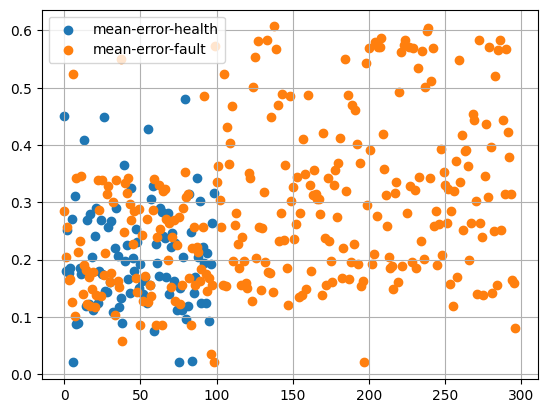

In [82]:
import matplotlib.pyplot as plt
plt.scatter(range(len(df_health)) , df_health['augment_mse'] , label = 'mean-error-health')
plt.scatter(range(len(df_fault)) , df_fault['augment_mse'] , label = 'mean-error-fault')
plt.legend()
plt.grid()
plt.show()

In [83]:
df

,mean,max,std,last,ratio,penalty,augment_mse,label
0,0.053991,0.260637,0.073650,0.091126,4.827399,0.397207,0.451198,0
1,0.038880,0.138233,0.037891,0.054611,3.555394,0.141178,0.180058,0
2,0.037194,0.184770,0.048625,0.184770,4.967673,0.214231,0.251425,0
3,0.025801,0.129153,0.032281,0.033689,5.005698,0.151535,0.177336,0
4,0.034882,0.128110,0.039825,0.016559,3.672705,0.150992,0.185874,0
...,...,...,...,...,...,...,...,...
391,0.050988,0.359326,0.089361,0.359326,7.047212,0.327398,0.378386,1
392,0.042550,0.379470,0.094745,0.379470,8.918225,0.272451,0.315001,1
393,0.042434,0.128057,0.039944,0.128057,3.017772,0.122259,0.164693,1
394,0.030816,0.106653,0.029334,0.035981,3.460937,0.127691,0.158507,1


In [86]:
from sklearn.model_selection import train_test_split

In [88]:
y_label = df['label']
X = df.drop(['label'] , axis = 1 )

In [91]:
x_train , x_test , y_train , y_test = train_test_split(X , y_label , test_size = 0.3 , random_state= 42 )

In [92]:
svc_model = SVC()
svc_model.fit(x_train , y_train )

SVC()

In [93]:
y_pre = svc_model.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
print(accuracy_score(y_pre , y_test ))

0.6890756302521008


In [98]:
window_size = 2
tail_size = 5
tail_weight = 3.0
slope_weight = 2.0

Total_Feature = []
Total_Label_Feature = []

def process_group(data, label):
    for picture in data[::4]:
        picture_reshaped = picture.reshape(16, 3)
        n_samples = picture_reshaped.shape[0] - window_size

        new_sample_x, new_sample_y = [], []
        for i in range(n_samples):
            new_sample_x.append(picture_reshaped[i:i+window_size])
            new_sample_y.append(picture_reshaped[i+window_size])

        new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
        new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

        total_y_pre = []
        for x in new_sample_x_array:
            y_pre = model.predict(np.expand_dims(x, axis=0), verbose=0)
            total_y_pre.append(y_pre[0])
        total_y_pre = np.array(total_y_pre)

        errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
        avg_error = np.mean(errors)

        tail_errors = errors[-tail_size:] if tail_size <= len(errors) else errors
        tail_mean = np.mean(tail_errors)

        slope_penalty = max(tail_errors[-1] - tail_errors[0], 0.0) if len(tail_errors) > 1 else 0.0

        augmented_mse = avg_error + tail_weight * tail_mean + slope_weight * slope_penalty

        features = [
            avg_error,
            np.max(errors),
            np.std(errors),
            errors[-1],
            np.max(errors)/(avg_error + 1e-8),
            tail_mean,
            slope_penalty,
            augmented_mse
        ]
        Total_Feature.append(features)
        Total_Label_Feature.append(str(label))


In [99]:
process_group(z_health, 0)
process_group(z_alpha, 1)
process_group(z_void, 1)
process_group(z_void_alpha, 1)


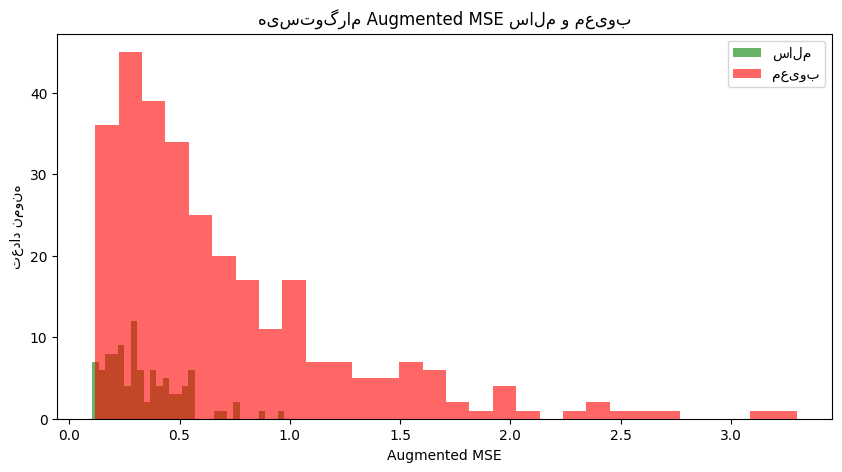

/tmp/ipython-input-2819316372.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([healthy_aug, defective_aug], labels=['سالم', 'معیوب'])


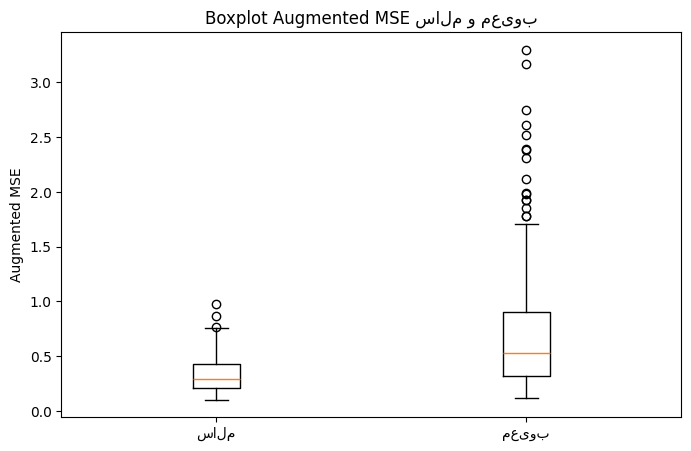

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# جمع‌آوری augmented_mse برای هر کلاس
healthy_aug = [x[-1] for i, x in enumerate(Total_Feature) if Total_Label_Feature[i] == '0']
defective_aug = [x[-1] for i, x in enumerate(Total_Feature) if Total_Label_Feature[i] == '1']

# -----------------------------
# 1. هیستوگرام
# -----------------------------
plt.figure(figsize=(10,5))
plt.hist(healthy_aug, bins=30, alpha=0.6, label='سالم', color='green')
plt.hist(defective_aug, bins=30, alpha=0.6, label='معیوب', color='red')
plt.xlabel('Augmented MSE')
plt.ylabel('تعداد نمونه')
plt.title('هیستوگرام Augmented MSE سالم و معیوب')
plt.legend()
plt.show()

# -----------------------------
# 2. Boxplot
# -----------------------------
plt.figure(figsize=(8,5))
plt.boxplot([healthy_aug, defective_aug], labels=['سالم', 'معیوب'])
plt.ylabel('Augmented MSE')
plt.title('Boxplot Augmented MSE سالم و معیوب')
plt.show()


In [ ]:
            avg_error,
            np.max(errors),
            np.std(errors),
            errors[-1],
            np.max(errors)/(avg_error + 1e-8),
            tail_mean,
            slope_penalty,
            augmented_mse

In [103]:
Total_Feature[0]

[np.float64(0.053991157952993425),
 np.float64(0.2606369157456887),
 np.float64(0.07364951454725499),
 np.float64(0.09112610286885928),
 np.float64(4.827399102990478),
 np.float64(0.1334325540376126),
 np.float64(0.01608288336953148),
 np.float64(0.4864545868048942)]

In [104]:
df2 = pd.DataFrame(Total_Feature , columns =['error','max' , 'std' , 'lst_error','ratio','tail_mean','slop','augment'])

In [105]:
df2['label'] = Total_Label_Feature

In [106]:
df_health_3 = df2[df2['label'] == '0']

In [108]:
df_faultt_4 = df2[df2['label'] == '1']

In [107]:
df_health_3

,error,max,std,lst_error,ratio,tail_mean,slop,augment,label
0,0.053991,0.260637,0.073650,0.091126,4.827399,0.133433,0.016083,0.486455,0
1,0.038880,0.138233,0.037891,0.054611,3.555394,0.067116,0.000000,0.240226,0
2,0.037194,0.184770,0.048625,0.184770,4.967673,0.080041,0.094623,0.466562,0
3,0.025801,0.129153,0.032281,0.033689,5.005698,0.056108,0.000000,0.194126,0
4,0.034882,0.128110,0.039825,0.016559,3.672705,0.065080,0.000000,0.230122,0
...,...,...,...,...,...,...,...,...,...
94,0.034386,0.142750,0.037604,0.142750,4.151434,0.069724,0.071006,0.385570,0
95,0.020791,0.088184,0.026773,0.001451,4.241468,0.035165,0.000000,0.126286,0
96,0.029772,0.143992,0.037044,0.143992,4.836547,0.062259,0.123636,0.463821,0
97,0.036248,0.309026,0.076301,0.034117,8.525265,0.081856,0.005830,0.293474,0


In [ ]:
df_health_3 = df2[df2['label'] == '0']


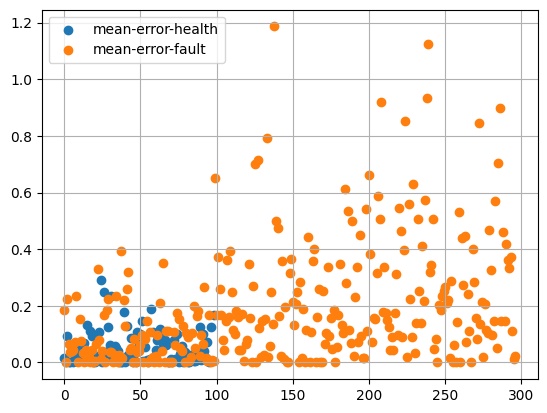

In [110]:
import matplotlib.pyplot as plt
plt.scatter(range(len(df_health)) , df_health_3['slop'] , label = 'mean-error-health')
plt.scatter(range(len(df_fault)) , df_faultt_4['slop'] , label = 'mean-error-fault')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

window_size = 2

# -------------------------------
# 1. آماده‌سازی داده‌های سالم
# -------------------------------
x_health_vec, y_health_vec, z_health_vec, errors_health_vec = [], [], [], []

for picture in z_health:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        x = picture_reshaped[i:i+window_size]
        y_true = picture_reshaped[i+window_size]

        y_pred = model.predict(np.expand_dims(x, axis=0), verbose=0)[0]
        error = np.sum((y_pred - y_true)**2)

        # بردارهای X,Y,Z برای رگرسیون
        for j in range(window_size):
            x_health_vec.append(x[j,0])
            y_health_vec.append(x[j,1])
            z_health_vec.append(x[j,2])
            errors_health_vec.append(error)

# -------------------------------
# 2. آماده‌سازی داده‌های معیوب (مثال: α)
# -------------------------------
x_alpha_vec, y_alpha_vec, z_alpha_vec, errors_alpha_vec = [], [], [], []

for picture in z_alpha:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        x = picture_reshaped[i:i+window_size]
        y_true = picture_reshaped[i+window_size]

        y_pred = model.predict(np.expand_dims(x, axis=0), verbose=0)[0]
        error = np.sum((y_pred - y_true)**2)

        for j in range(window_size):
            x_alpha_vec.append(x[j,0])
            y_alpha_vec.append(x[j,1])
            z_alpha_vec.append(x[j,2])
            errors_alpha_vec.append(error)

# -------------------------------
# 3. ساخت ماتریس X و بردار Y برای رگرسیون
# -------------------------------
X_health = np.stack([x_health_vec, y_health_vec, z_health_vec], axis=1)
y_health = np.array(errors_health_vec)

X_alpha = np.stack([x_alpha_vec, y_alpha_vec, z_alpha_vec], axis=1)
y_alpha = np.array(errors_alpha_vec)

# -------------------------------
# 4. برازش رگرسیون خطی
# -------------------------------
reg_health = LinearRegression().fit(X_health, y_health)
reg_alpha = LinearRegression().fit(X_alpha, y_alpha)

print("سالم - ضرایب a,b,c:", reg_health.coef_, "intercept:", reg_health.intercept_)
print("معیوب α - ضرایب a,b,c:", reg_alpha.coef_, "intercept:", reg_alpha.intercept_)

# -------------------------------
# 5. پیش‌بینی خطا و دسته‌بندی نمونه‌ها
# -------------------------------
def predict_error(X_vec, reg_model):
    return reg_model.predict(np.stack(X_vec, axis=1))

# مثال پیش‌بینی خطای یک تصویر سالم
X_test_example = np.array([[0.1, 0.2, 0.3], [0.2,0.1,0.3]])  # نمونه پنجره
pred_error = reg_health.predict(X_test_example)
print("خطای پیش‌بینی‌شده:", pred_error)
